In [ ]:
import pandas as pd

df = pd.read_csv("shopping_trends_updated.csv")
print(df.head)
print(df.shape)
print(df.isnull().sum())
print(df.dtypes)

<bound method NDFrame.head of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2              

In [ ]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [ ]:
df[["Age", "Purchase Amount (USD)", "Review Rating","Previous Purchases" ]].corr()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),-0.010424,1.000000,0.030776,0.008063
Review Rating,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,0.040445,0.008063,0.004229,1.000000


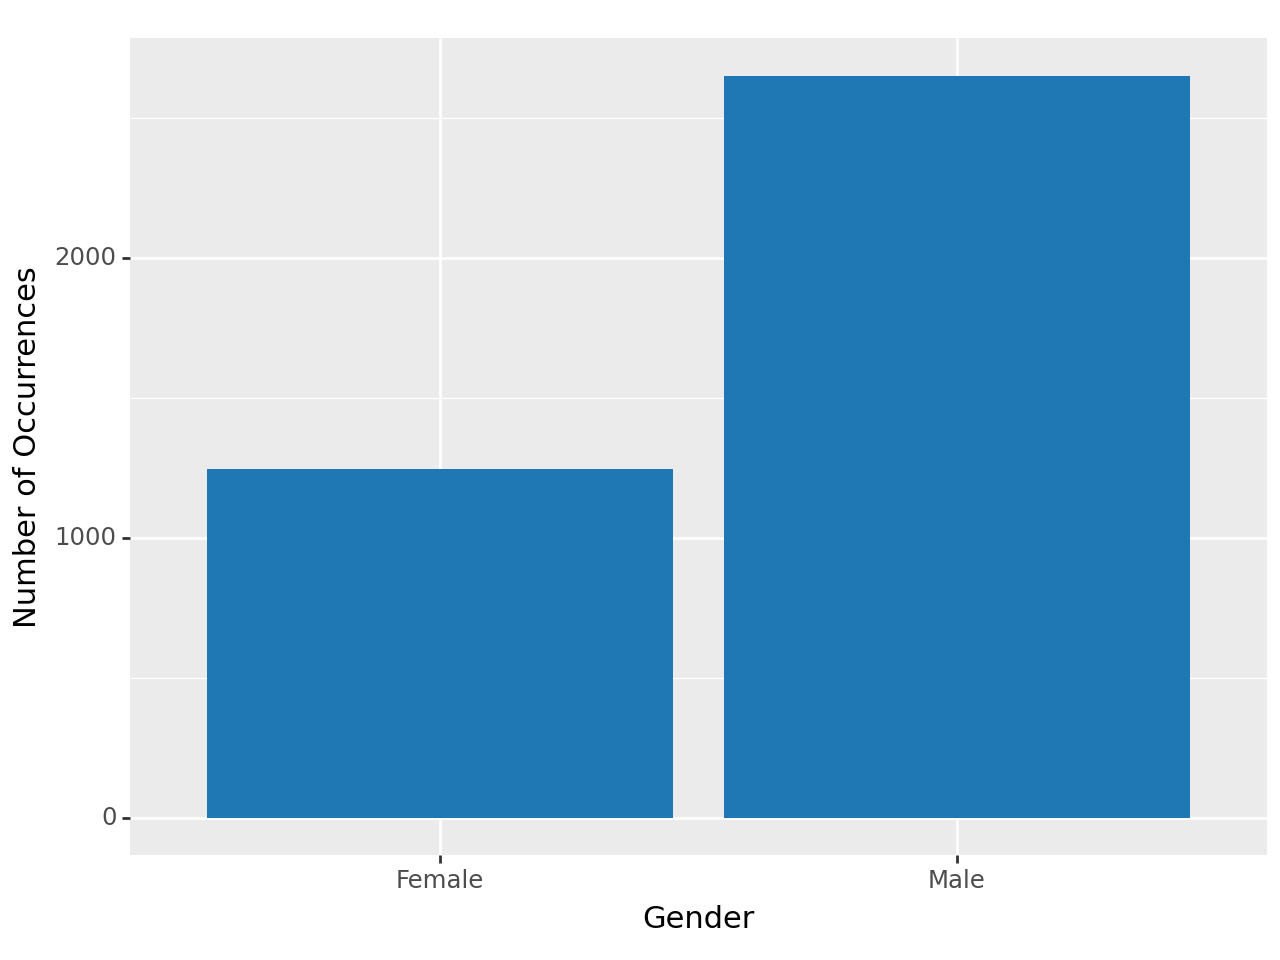

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import *
from plotnine import ggplot
(
    ggplot(df, aes(x='Gender')) +
    geom_bar(fill="#1f77b4") +
    labs(x='Gender', y='Number of Occurrences')

)


Number of Iteams Purchased

In [ ]:
df["Item Purchased"].value_counts()

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

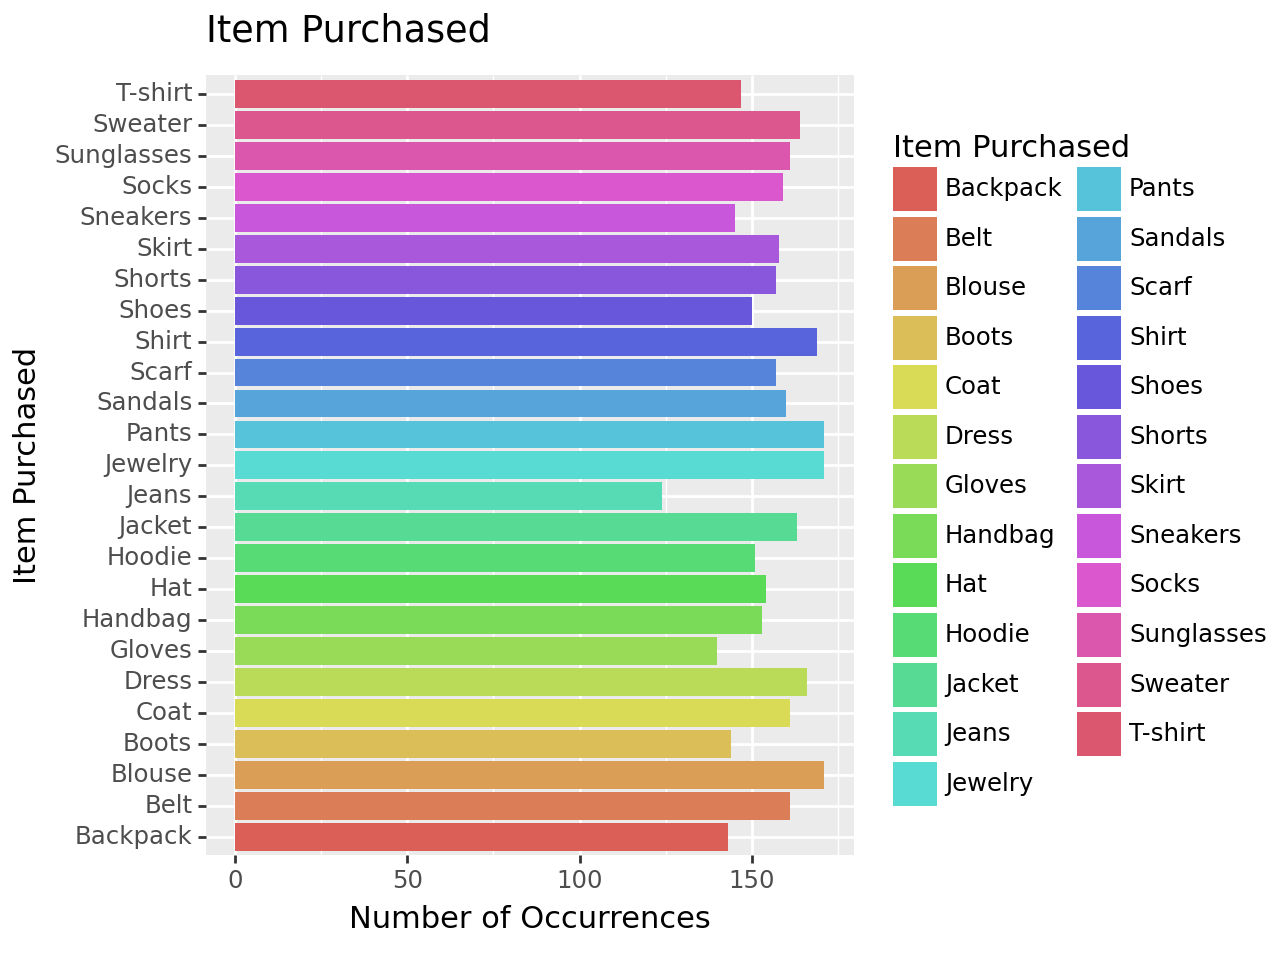

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(df, aes(x='Item Purchased', fill='Item Purchased')) +
 geom_bar() +
 labs(x='Item Purchased', y='Number of Occurrences', title='Item Purchased') +
 coord_flip())

Total number of product catagory

In [ ]:
df["Category"].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

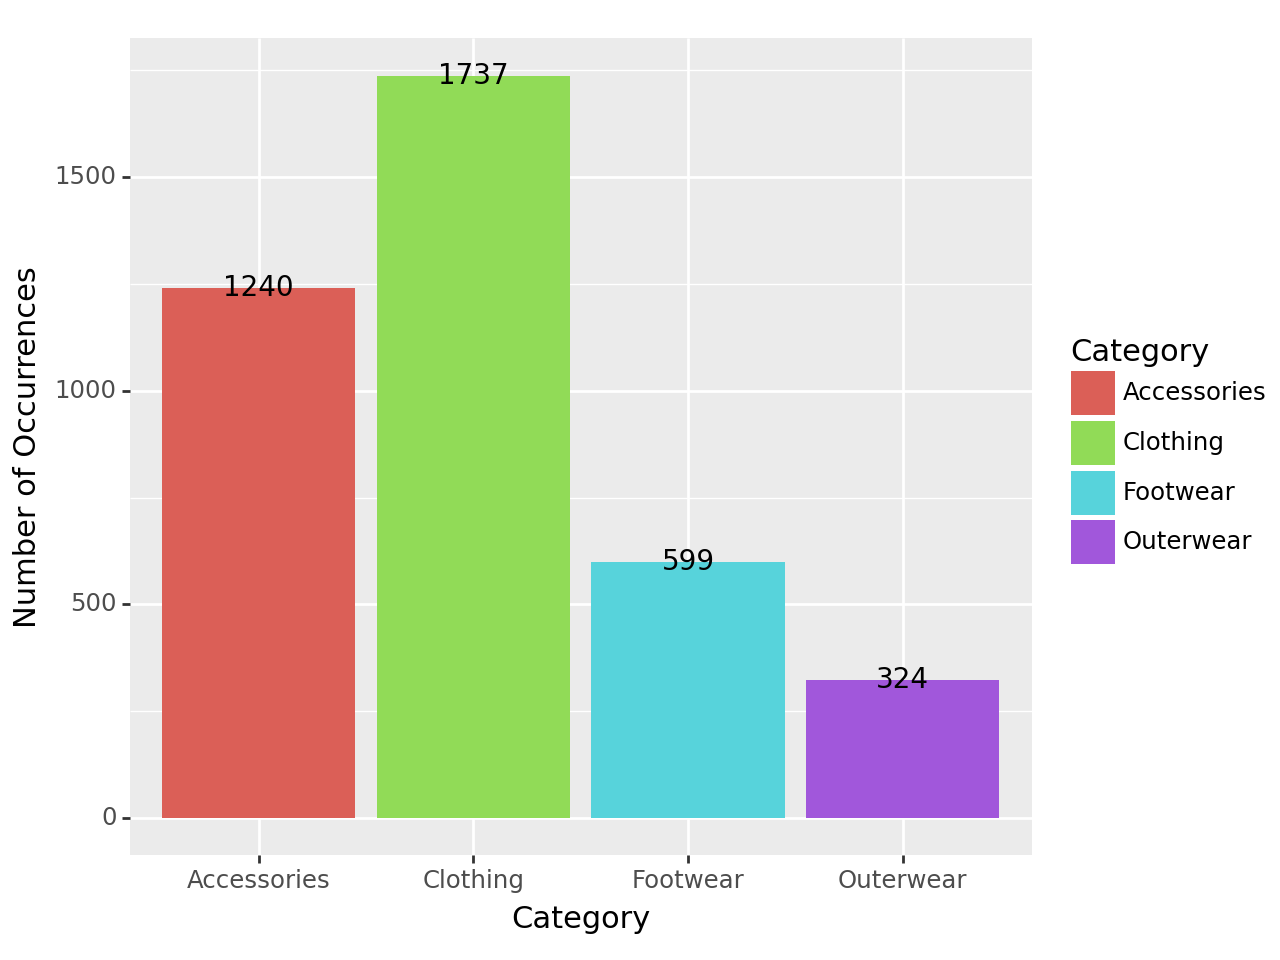

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import *

(ggplot(df, aes(x='Category', fill='Category')) +
 geom_bar() +
 geom_text(aes(label='stat(count)'), stat='count', size=10)+
 labs(y='Number of Occurrences'))

In [ ]:
df["Size"].value_counts()

M     1755
L     1053
S      663
XL     429
Name: Size, dtype: int64

What are the most different types of size?

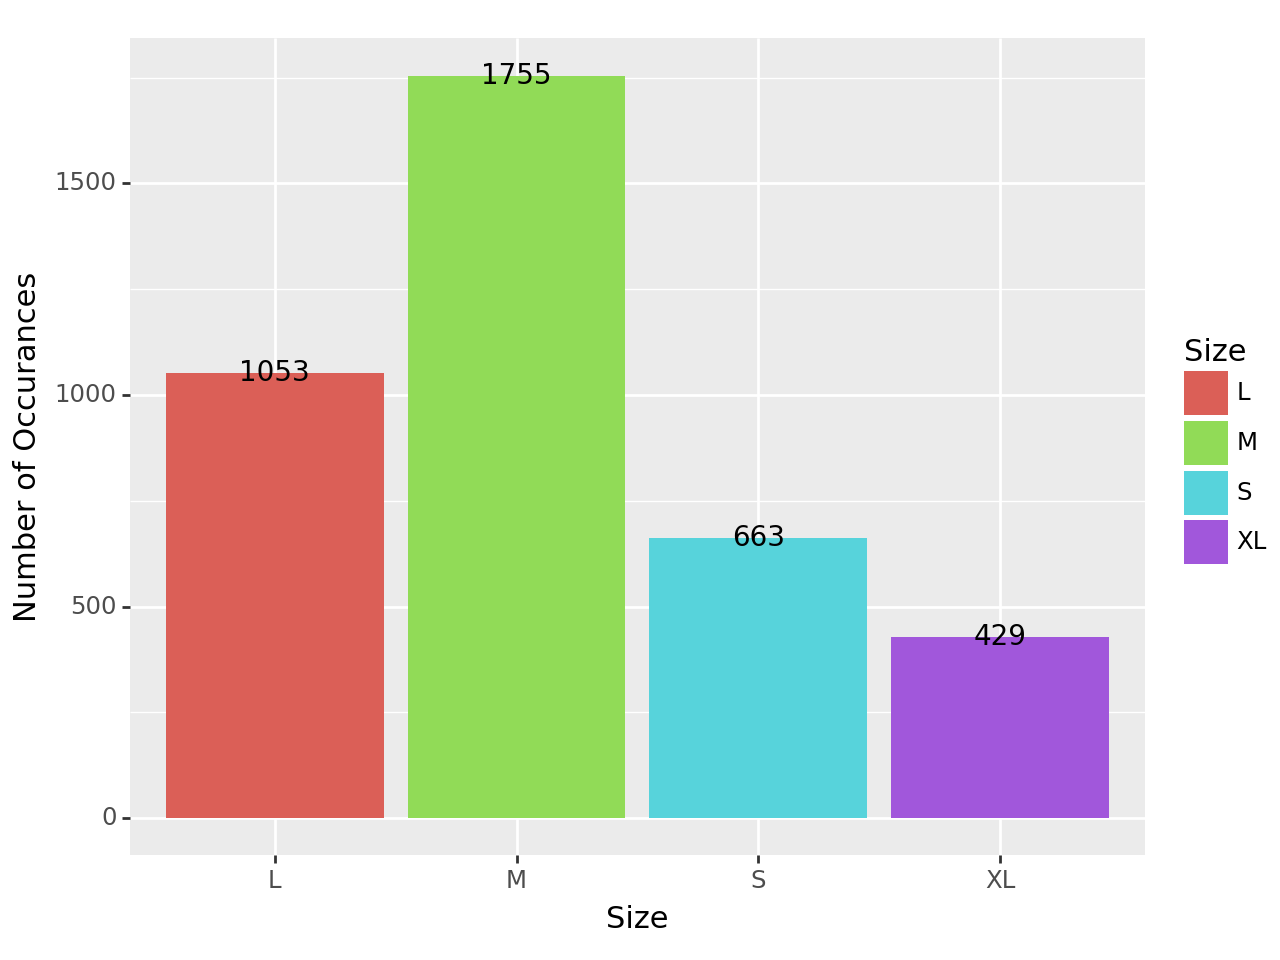

<Figure Size: (640 x 480)>

In [ ]:
(ggplot
 (df, aes(x ='Size', fill = 'Size')) +
 geom_bar()+
 geom_text(aes(label = 'stat(count)'), stat = 'count', size= 10)+
 labs(x ='Size', y = 'Number of Occurances')
)

In [ ]:
#What is the average age of customers in the dataset ?

average_age = df['Age'].mean()
print("Average Age:", average_age)

Average Age: 44.06846153846154


In [ ]:
#What is the most common item purchased ?

most_common_item = df['Item Purchased'].mode()[0]
print("Most Common Item Purchased:", most_common_item)


Most Common Item Purchased: Blouse


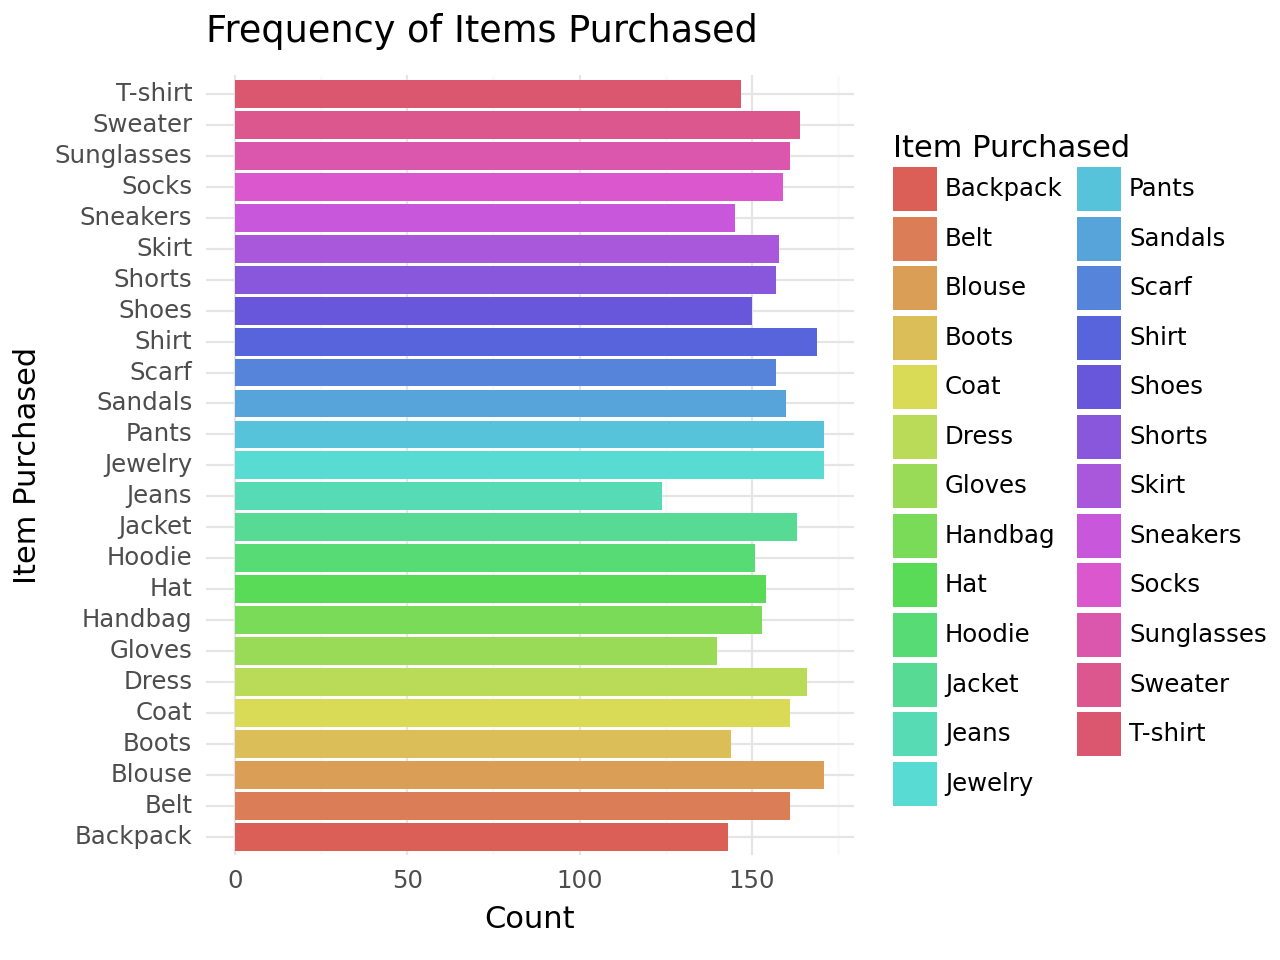

<Figure Size: (640 x 480)>

In [ ]:

# Count occurrences of each item
item_counts = df['Item Purchased'].value_counts().reset_index()
item_counts.columns = ['Item Purchased', 'Count']

# Plotting using ggplot
(ggplot(item_counts, aes(x='Item Purchased', y='Count', fill='Item Purchased')) +
 geom_bar(stat='identity') +
 theme_minimal() +
 labs(x='Item Purchased', y='Count', title='Frequency of Items Purchased') +
 coord_flip()
)


In [ ]:
#What is the total purchase amount for each category ?

total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Category:",total_purchase_by_category)


Total Purchase Amount by Category: Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


In [ ]:
#What is the most common payment method used by customers ?

most_common_payment_method = df['Payment Method'].mode()[0]
print("Most Common Payment Method:", most_common_payment_method)

Most Common Payment Method: PayPal


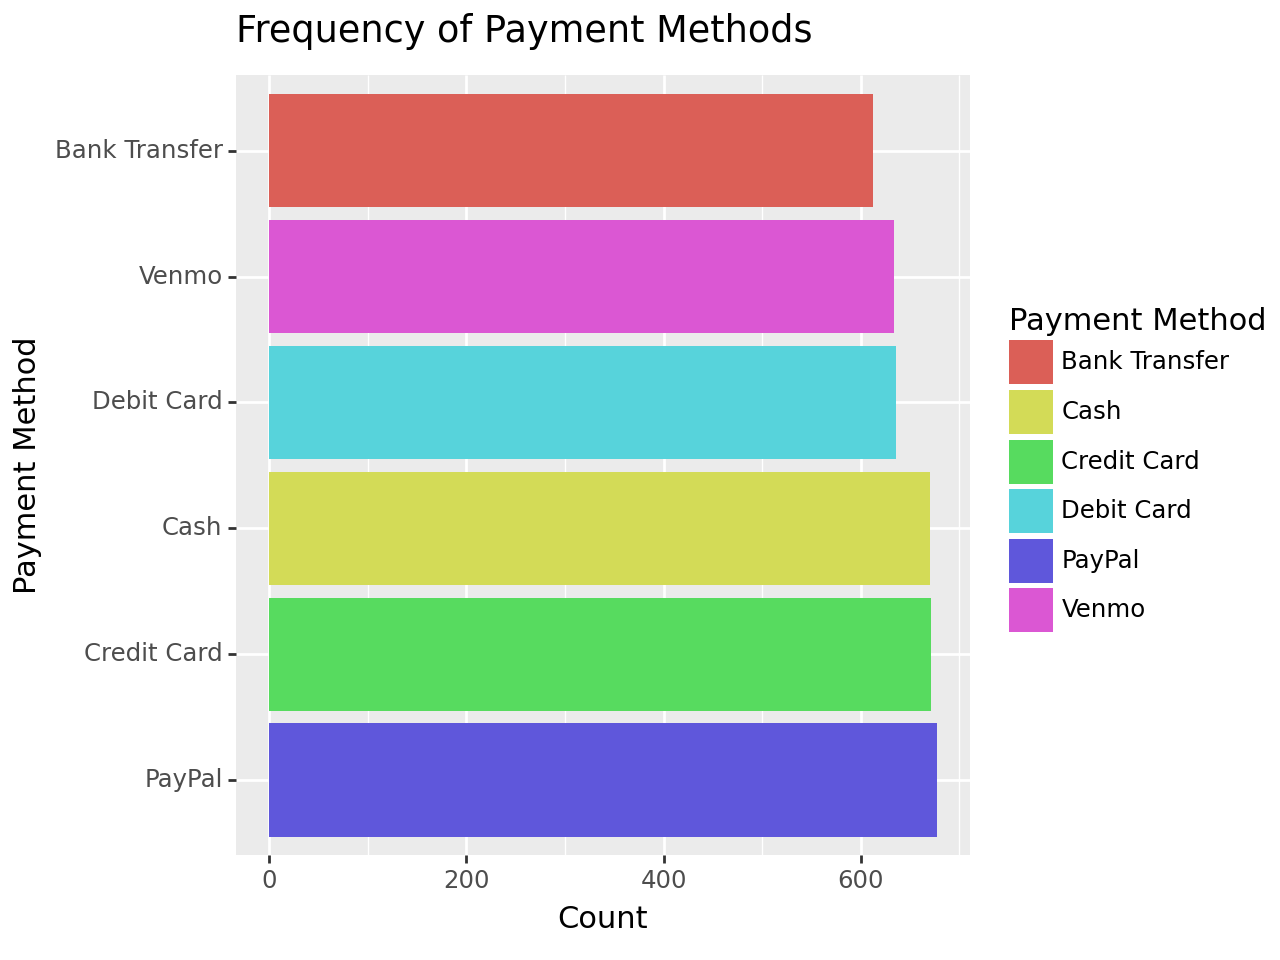

<Figure Size: (640 x 480)>

In [ ]:

# Count occurrences of each payment method
payment_counts = df['Payment Method'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Count']
(
    ggplot(payment_counts, aes(x='Payment Method', y='Count', fill='Payment Method')) +
    geom_bar(stat='identity') +
    scale_x_discrete(limits=payment_counts['Payment Method']) +
    labs(x='Payment Method', y='Count', title='Frequency of Payment Methods') +
    coord_flip()
)


In [ ]:
#What is the total purchase amount for each gender ?

total_purchase_by_gender= df.groupby('Gender')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Gender:", total_purchase_by_gender)

Total Purchase Amount by Gender: Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


In [ ]:
#What is the average age of cutomers with most purchase

average_age_most_purchases_customer = df[df['Customer ID'] == df['Customer ID'].value_counts().idxmax()]['Age'].mean()

print("Average Age of the Customer who made the most purchases:", average_age_most_purchases_customer)


Average Age of the Customer who made the most purchases: 55.0


What are the purchase frequencies in the dataset?

In [ ]:
df["Frequency of Purchases"].value_counts()

Every 3 Months    584
Annually          572
Quarterly         563
Monthly           553
Bi-Weekly         547
Fortnightly       542
Weekly            539
Name: Frequency of Purchases, dtype: int64

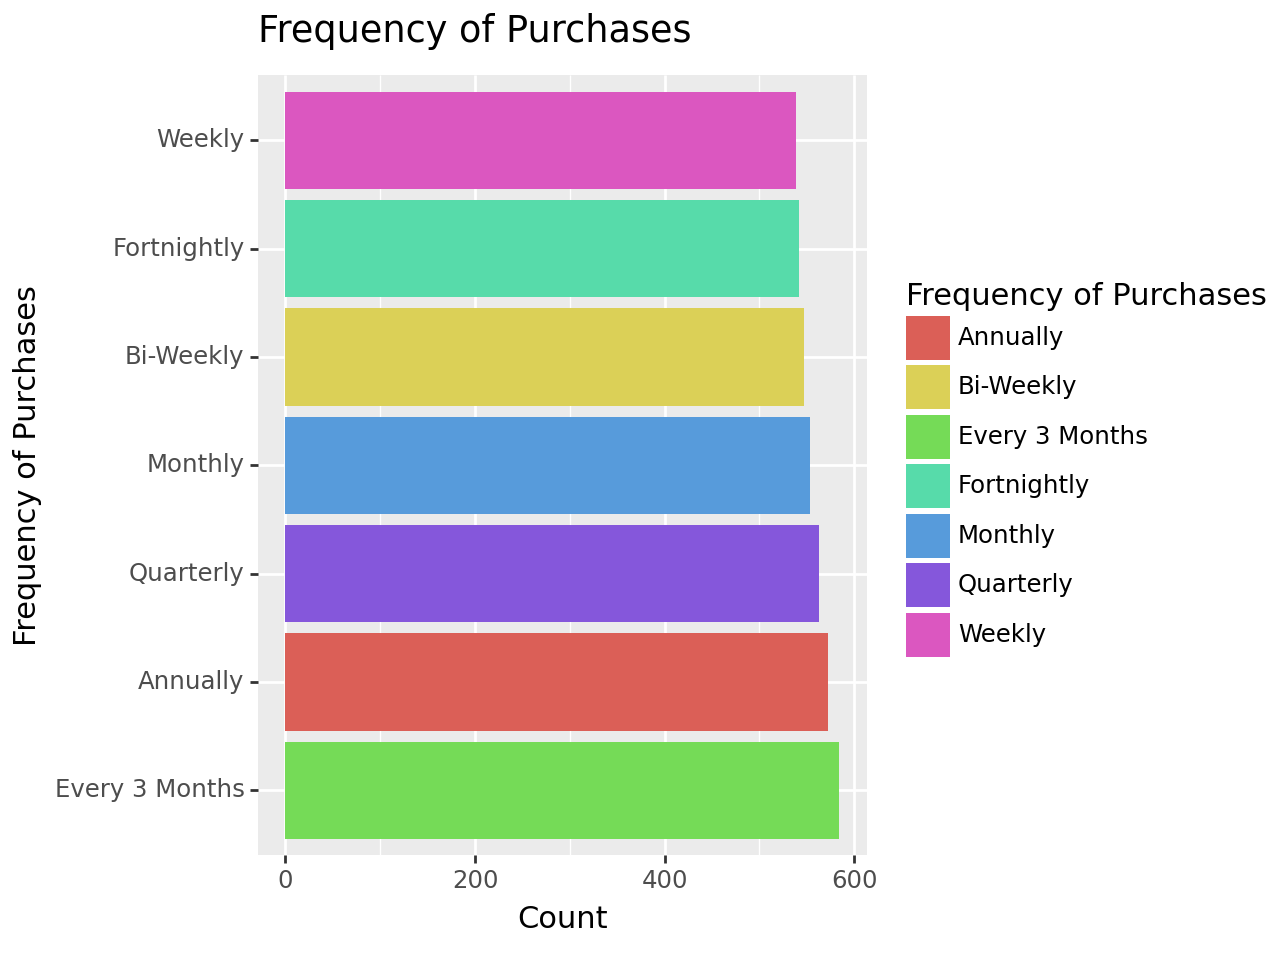

<Figure Size: (640 x 480)>

In [ ]:
# Count occurrences of each frequency of purchases
frequency_counts = df['Frequency of Purchases'].value_counts().reset_index()
frequency_counts.columns = ['Frequency of Purchases', 'Count']

# Plotting using ggplot
(
    ggplot(frequency_counts, aes(x='Frequency of Purchases', y='Count', fill='Frequency of Purchases')) +
    geom_bar(stat='identity') +
    scale_x_discrete(limits=frequency_counts['Frequency of Purchases']) +
    labs(x='Frequency of Purchases', y='Count', title='Frequency of Purchases') +
    coord_flip()
)

In [ ]:
#What is the most common season for purchase?

most_common_season =df['Season'].mode()[0]
print("Most common season for purchase:", most_common_season)

Most common season for purchase: Spring


In [ ]:
#What is the total purchase amount for each gender ?
total_purchase_by_gender = df.groupby('Gender')['Purchase Amount (USD)'].sum()
total_purchase_by_gender

Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64

In [ ]:
#What is proportionate purchase between male and female?

# Calculate count of individuals for each gender
count_by_gender = df['Gender'].value_counts()

# Calculate average purchase amount per person for each gender
average_purchase_per_person = total_purchase_by_gender / count_by_gender
average_purchase_per_person

Female    60.249199
Male      59.536199
dtype: float64

In [ ]:
#How many customers used a promo code for their purchase ?
promo_code_count = df[df['Promo Code Used'] == "Yes" ]['Customer ID'].count()
print("Total promo code used:", promo_code_count)

Total promo code used: 1677


In [ ]:
#What is the total purchase amount for customers in each location ?

total_purchase_by_location =df.groupby('Location')['Purchase Amount (USD)'].sum()
print("Total purchse by location:", total_purchase_by_location)

Total purchse by location: Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee         477

In [ ]:
#Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd


file_path = '/content/shopping_trends_updated.csv'
shopping_data = pd.read_csv(file_path)

features = ['Age', 'Gender', 'Category', 'Review Rating', 'Previous Purchases']
target = 'Purchase Amount (USD)'

categorical_features = ['Gender', 'Category']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X = shopping_data[features]
y = shopping_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(561.1873213793241, -0.0028681203435776403)

In [ ]:
#Non-Linear Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#dataset loading
file_path = '/content/shopping_trends_updated.csv'
shopping_trends_df = pd.read_csv(file_path)

#Target variable and Independent variables mentioning
target = 'Purchase Amount (USD)'
independent_vars = shopping_trends_df.drop(columns=[target, 'Customer ID', 'Item Purchased'])

categorical_cols = independent_vars.select_dtypes(include=['object', 'category']).columns
numeric_cols = independent_vars.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

poly_degree = 2

X = independent_vars
y = shopping_trends_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=poly_degree)),
    ('regressor', LinearRegression())
])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3957.45282353408
R-squared: -6.072154204644564


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

file_path = '/content/shopping_trends.csv'
shopping_trends_df = pd.read_csv(file_path)

le = LabelEncoder()
shopping_trends_df['Review Rating'] = le.fit_transform(shopping_trends_df['Review Rating'])

target = 'Purchase Amount (USD)'
independent_vars = shopping_trends_df.drop(columns=[target, 'Customer ID', 'Item Purchased'])

categorical_cols = independent_vars.select_dtypes(include=['object', 'category']).columns
numeric_cols = independent_vars.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X = independent_vars
y = shopping_trends_df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.019230769230769232
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

file_path = '/content/shopping_trends_updated.csv'
shopping_trends_df = pd.read_csv(file_path)

features = shopping_trends_df.loc[:, ['Age', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Review Rating', 'Previous Purchases']]
target = shopping_trends_df.loc[:, 'Purchase Amount (USD)']

categorical_cols = features.select_dtypes(include=['object', 'category']).columns
numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Combining preprocessor and model in a Pipeline
final_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline on the features and target
final_pipe.fit(features, target)

# Splitting the processed features and target into train and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Fit the model using the processed training data
final_pipe.fit(features_train, target_train)

# Use the trained model to make predictions on the test set
predicted_purchase = final_pipe.predict(features_test)

# Calculate Mean Squared Error
mse = mean_squared_error(target_test, predicted_purchase)

# Calculate R-squared
r2 = r2_score(target_test, predicted_purchase)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 565.8255431207649
R-squared: -0.015389711917022542


In [ ]:
(
    pd.DataFrame({
        'actual_purchase' : list(target_test),
        'predicted_purchase' : list(predicted_purchase)
    })
).head(n = 10)

,actual_purchase,predicted_purchase
0,31,63.273496
1,50,54.592156
2,36,62.274057
3,72,60.509747
4,38,58.973765
5,36,57.965701
6,83,53.833942
7,70,55.236453
8,41,59.077743
9,46,56.294304


## Predictive modelling using:

**Feature engineering**

**Hyperparameter tuning**

**Cross-validation**

**Ensemble methods**


The process mentioned below is building, training, and evaluating a machine learning model for predicting the "Purchase Amount (USD)" based on various features in a shopping dataset

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [ ]:
file_path = '/content/shopping_trends_updated.csv'
shopping_trends_df = pd.read_csv(file_path)

Data Splitting:
The dataset is split into training and testing sets using the train_test_split function from scikit-learn. The split is 80% training and 20% testing.

Data Preprocessing:
The data is preprocessed using the ColumnTransformer to apply different preprocessing steps to numerical and categorical features separately.
*   Numerical features (like 'Age', 'Review Rating', 'Previous Purchases') are imputed with the mean and scaled using StandardScaler.
*   Categorical features (like 'Item Purchased', 'Category', 'Location', 'Size', 'Color') are imputed with the most frequent value and one-hot encoded.




In [ ]:
# Separate features and target variable
features = ['Age', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Review Rating', 'Previous Purchases']
target = 'Purchase Amount (USD)'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(shopping_data[features], shopping_data[target], test_size=0.2, random_state=42)

# Preprocessing for numerical data
numerical_features = ['Age', 'Review Rating', 'Previous Purchases']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_features = ['Item Purchased', 'Category', 'Location', 'Size', 'Color']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])



Model Definition:
The machine learning model is defined as a pipeline that includes the preprocessing steps and a RandomForestRegressor as the regression algorithm.

Hyperparameter Tuning:
Grid search is performed to find the best hyperparameters for the RandomForestRegressor. The grid includes different values for the number of estimators, maximum depth, minimum samples split, and minimum samples leaf.

In [ ]:
%pip install prettytable

In [ ]:
from prettytable import PrettyTable

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

# Hyperparameter tuning using GridSearchCV for RandomForestRegressor
param_grid = {
    'regressor__n_estimators': [50, 100],
    'regressor__max_depth': [None, 10],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Use n_jobs parameter for parallelization
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Print results
table = PrettyTable()
table.field_names = ["Parameter", "Value"]

for param, value in best_params.items():
    table.add_row([param, value])

print("Best Hyperparameters:")
print(table)


Best Hyperparameters:
+------------------------------+-------+
|          Parameter           | Value |
+------------------------------+-------+
|     regressor__max_depth     |   10  |
| regressor__min_samples_leaf  |   2   |
| regressor__min_samples_split |   2   |
|   regressor__n_estimators    |   50  |
+------------------------------+-------+


Cross-Validation:
Cross-validation is performed using the k-fold cross-validation technique to evaluate the model's performance. The mean squared error is used as the scoring metric.

Random Forest Model without Grid Search:
An additional section demonstrates the training, prediction, and evaluation of a RandomForestRegressor without hyperparameter tuning, using a subset of features.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
# Cross-validation using k-fold cross-validation for Linear Regression
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cross_val_score = cross_val_scores.mean()

# Ensemble method: Random Forest Regression
# Separate features and target variable for Random Forest
rf_features = ['Age', 'Review Rating', 'Previous Purchases']
rf_target = 'Purchase Amount (USD)'

X_rf = shopping_data[rf_features]
y_rf = shopping_data[rf_target]

# Split the data into training and testing sets for Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Build Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Predictions
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

# Print results in a fancy table
table = PrettyTable()
table.field_names = ["Metric", "Value"]
table.add_row(["Mean Cross-Validation Score", mean_cross_val_score])
table.add_row(["Random Forest Mean Squared Error", mse_rf])
table.add_row(["Random Forest R-squared", r2_rf])

print("Results:")
print(table)

Results:
+----------------------------------+---------------------+
|              Metric              |        Value        |
+----------------------------------+---------------------+
|   Mean Cross-Validation Score    |  -587.9294119551282 |
| Random Forest Mean Squared Error |   632.366475949364  |
|     Random Forest R-squared      | -0.1300686151370991 |
+----------------------------------+---------------------+


The results suggest that the Random Forest model, with the best hyperparameters obtained from grid search, is not very effective in predicting the "Purchase Amount (USD)" for the given dataset.

Best Hyperparameters:

The grid search identified the following hyperparameters as the best for the RandomForestRegressor:
max_depth: 10
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 50
These hyperparameters indicate that the trees in the random forest are relatively shallow.

Mean Cross-Validation Score:

The negative mean squared error from cross-validation is -590.51. The negative sign is common in scikit-learn's cross-validation results, and it is used to align with the convention that higher scores are better. In this case, the negative value indicates that the model is not performing well, and a higher absolute value means worse performance.

Random Forest Mean Squared Error:

The mean squared error (MSE) on the test set is 632.37. MSE measures the average squared difference between the predicted values and the actual values. A lower MSE is desirable, but the absolute value needs to be interpreted in the context of the specific problem.

Random Forest R-squared:

The R-squared value is -0.13. R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A negative R-squared indicates that the model is performing worse than a model that predicts the mean of the target variable for all observations.

## **PUNITA - PART II   Customer segmentation**

Customer segmentation based on shopping behavior involves dividing a customer base into groups or segments based on their purchasing patterns, preferences, and behaviors.

The goal is to identify meaningful clusters of customers who exhibit similar characteristics and tendencies when it comes to shopping.

By doing so, businesses can tailor their marketing strategies, product offerings, and customer experiences to better meet the specific needs and expectations of each segment.

This approach can lead to more effective and personalized communication, improved customer satisfaction, and ultimately, increased profitability.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv('/content/shopping_trends_updated.csv')

Data Preprocessing:

The dataset is prepared for analysis by handling missing values, outliers, and converting categorical variables into a format suitable for machine learning algorithms.

In [ ]:
# a. Data Preprocessing
# Handle missing data
# For simplicity, we'll use mean imputation for numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

In [ ]:
# Handle outliers (you may use a more sophisticated method)
# For simplicity, we'll use z-score method for numerical features
z_scores = np.abs((df[numerical_features] - df[numerical_features].mean()) / df[numerical_features].std())
df = df[(z_scores < 3).all(axis=1)]

In [ ]:
# Identify categorical columns for one-hot encoding
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert categorical variables into numerical formats using one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns)


In [ ]:
# Standardize or normalize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
# Print the column names in your DataFrame
print(df.columns)




Feature Selection:

Relevant features related to customer behavior, such as age, review rating, previous purchases, and frequency of purchases, are selected for clustering.


In [ ]:
# b. Feature Selection

# Identify relevant features
selected_features = ['Age', 'Review Rating', 'Previous Purchases', 'Frequency of Purchases_Annually']
X = df[selected_features]

K-Means Clustering:

The K-Means algorithm is applied to group customers into clusters based on the selected features. The optimal number of clusters is determined using the elbow method and silhouette analysis.
Visualization:



In [ ]:
# c. Clustering Algorithm (K-Means)

# Determine the optimal number of clusters (K)
# Using the elbow method
inertia_values = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

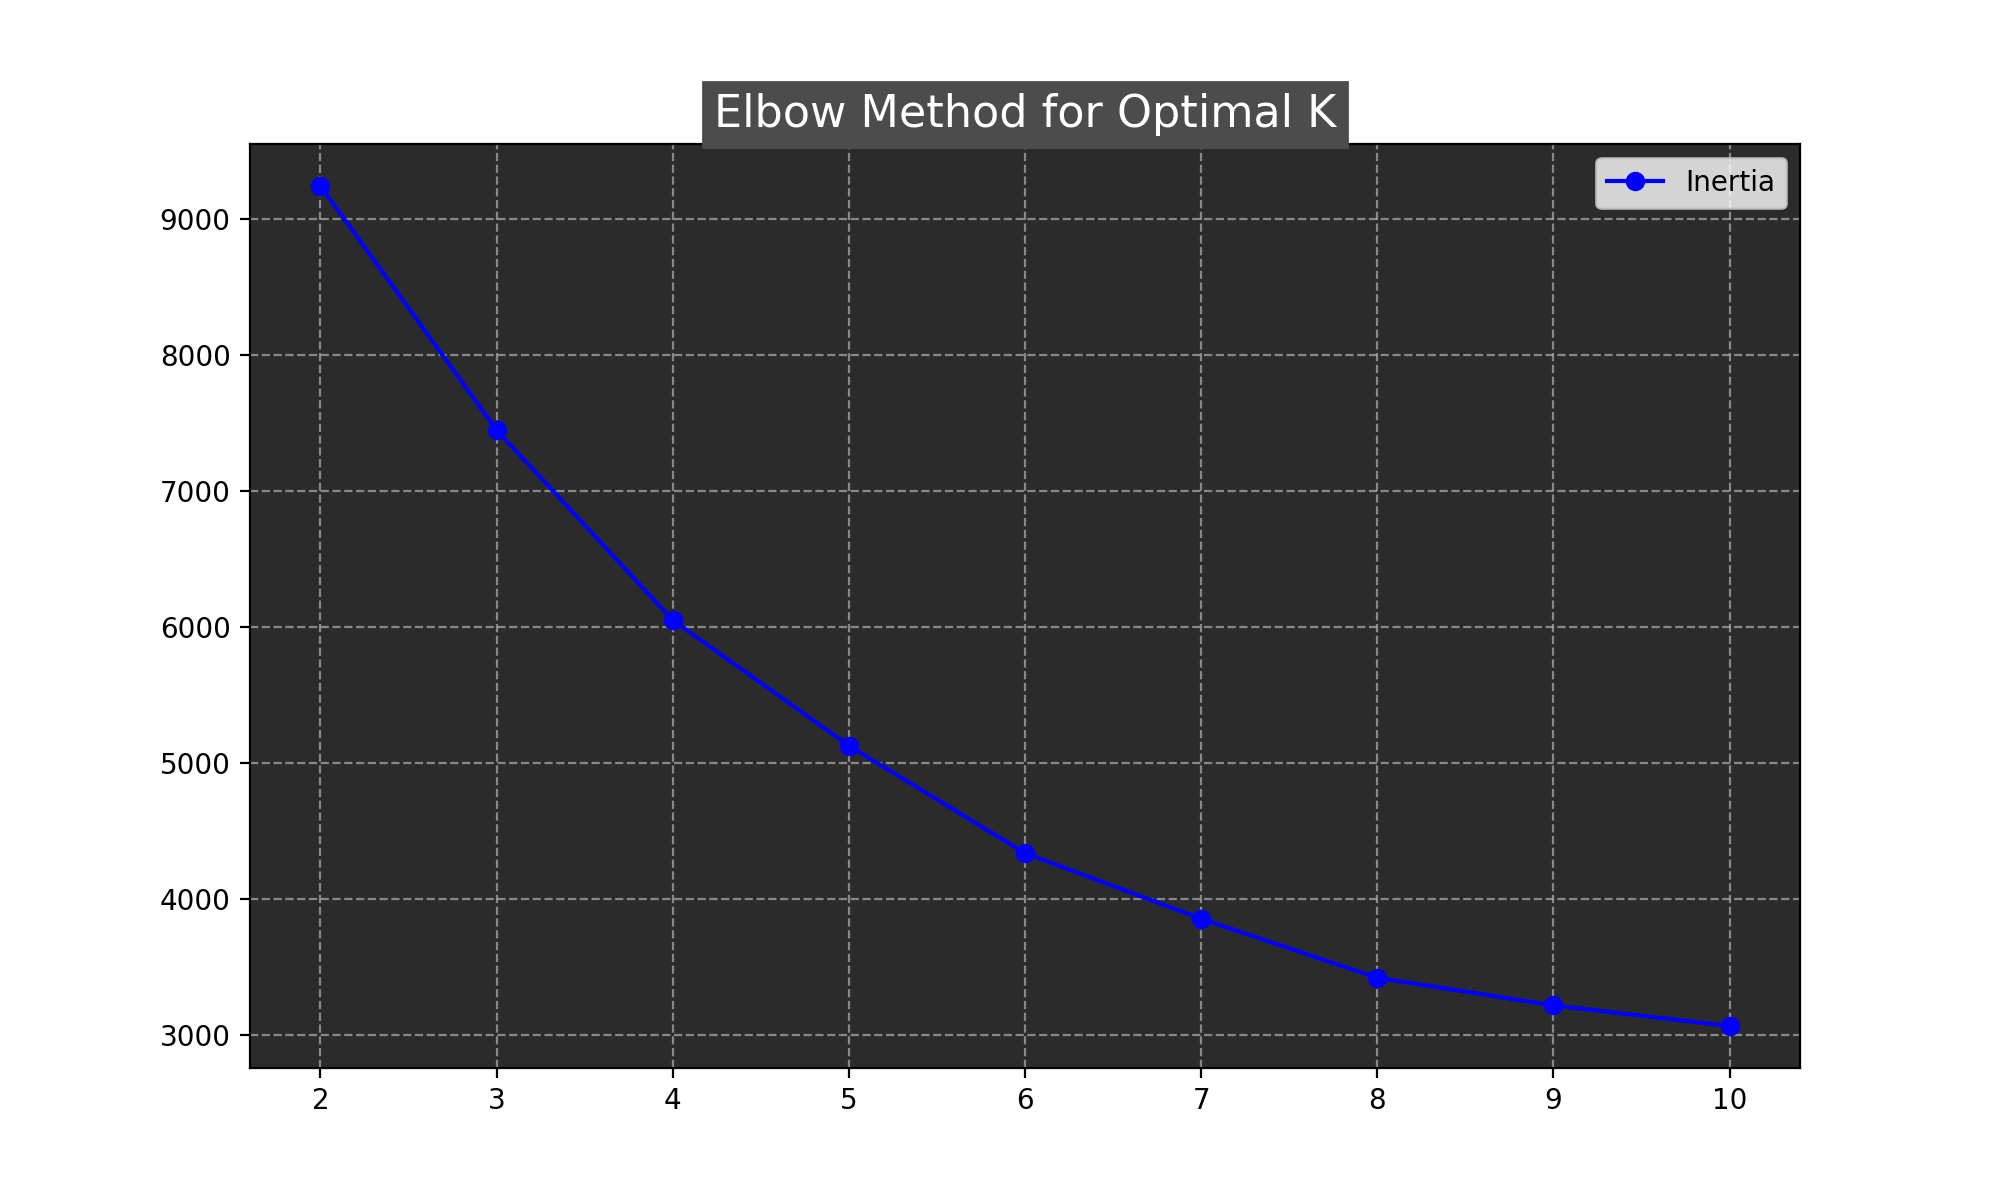

In [ ]:
# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='-', color='b', label='Inertia')
plt.title('Elbow Method for Optimal K', fontsize=16, color='white', backgroundcolor='#4c4c4c')
plt.xlabel('Number of Clusters (K)', fontsize=14, color='white')
plt.ylabel('Inertia', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#2b2b2b')  # Set background color for the plot
plt.show()

In [ ]:
# Using silhouette analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

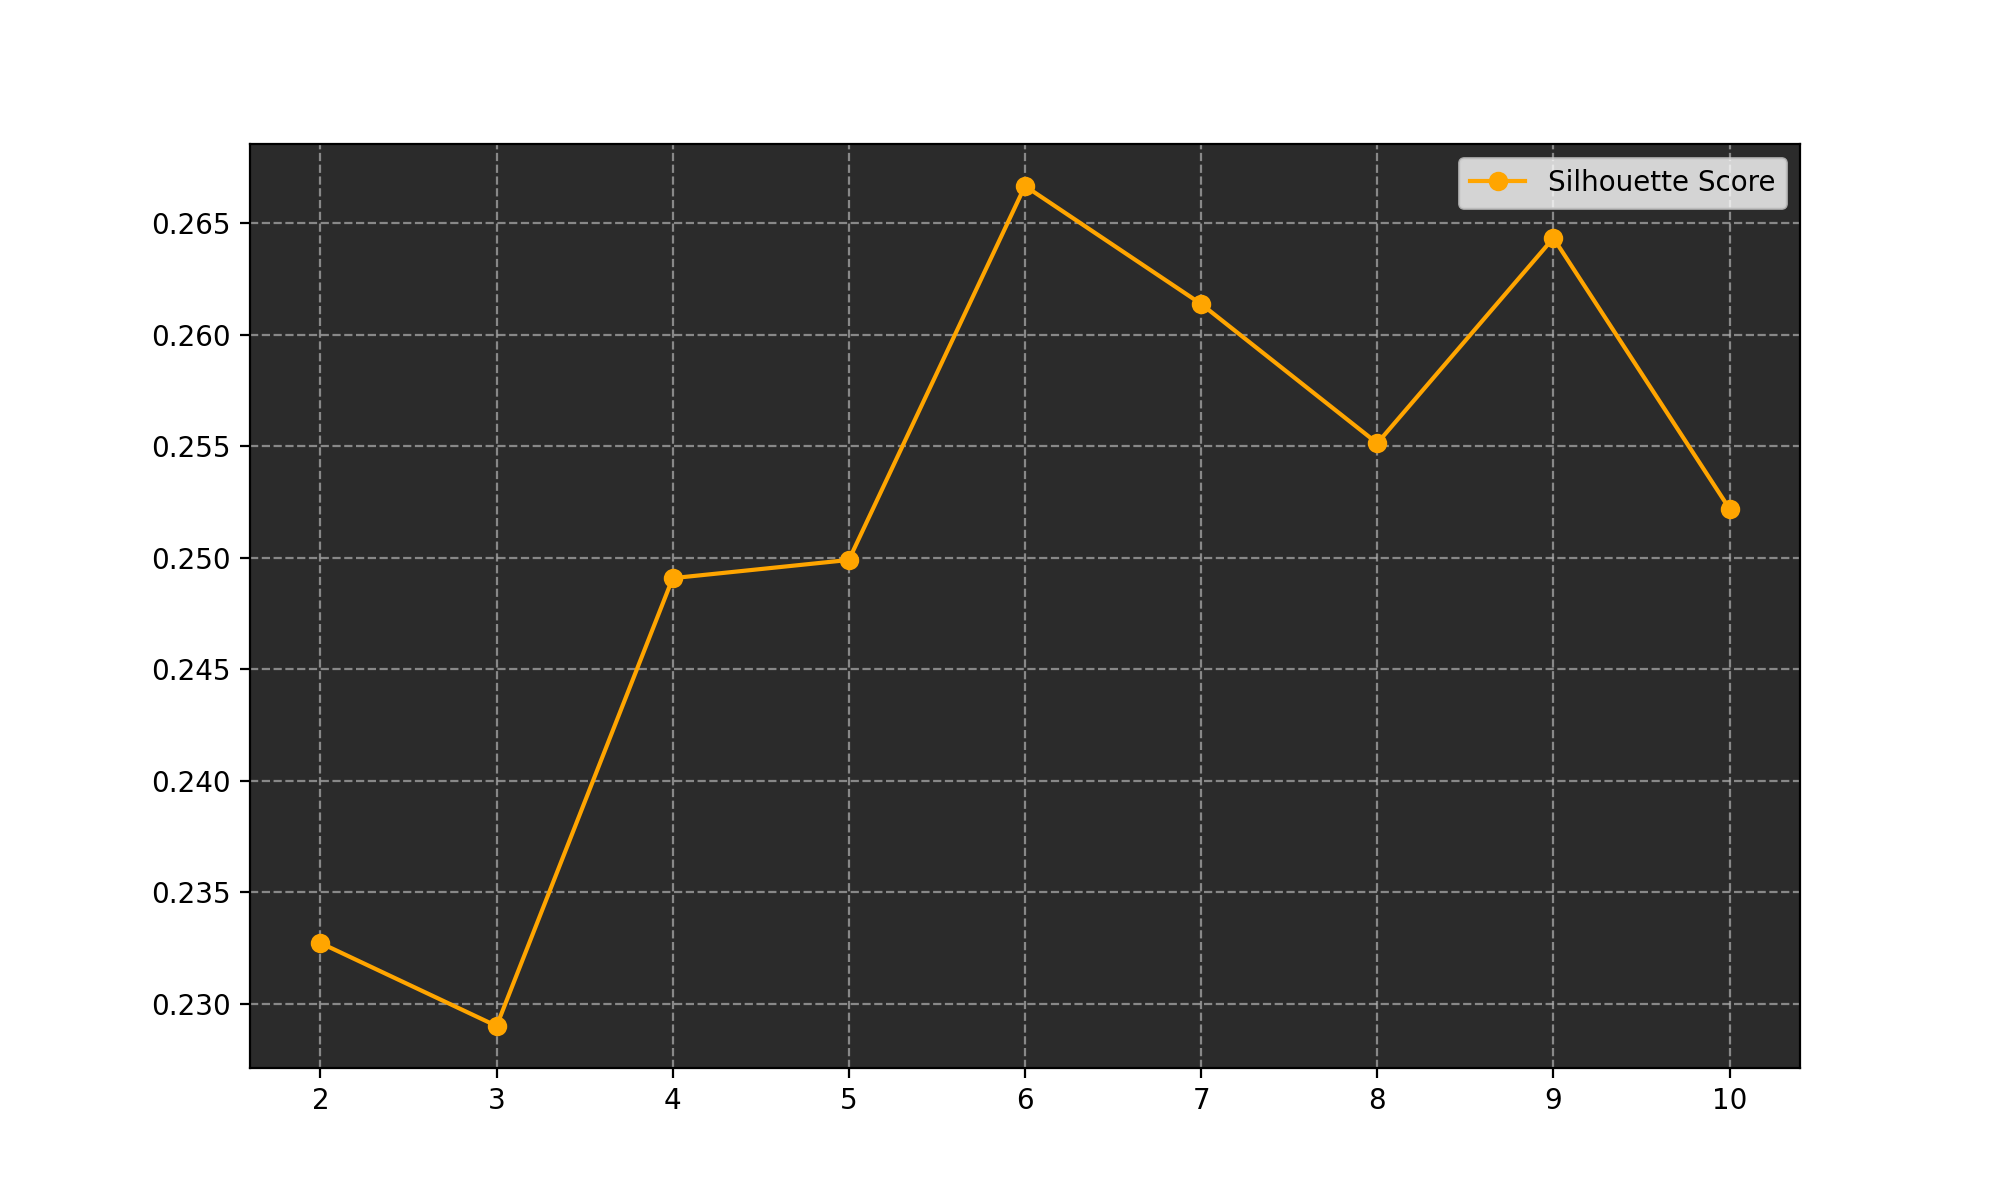

In [ ]:
# Plot silhouette scores
def gradient_background(ax):
    cmap = LinearSegmentedColormap.from_list('background', ['#2b2b2b', '#1a1a1a'])
    ax.imshow(np.linspace(0, 1, 256).reshape(1, -1), aspect='auto', cmap=cmap, origin='lower')

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-', color='orange', label='Silhouette Score')
plt.title('Silhouette Analysis for Optimal K', fontsize=16, color='white')
plt.xlabel('Number of Clusters (K)', fontsize=14, color='white')
plt.ylabel('Silhouette Score', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#2b2b2b')  # Sets the background color for the entire plot
plt.show()

In [ ]:
import seaborn as sns

Principal Component Analysis (PCA) is used to reduce the dimensionality of the data for visualization purposes.

Scatter plots are generated to visually represent the clusters in a 2D space.

Bottom Panel with Cluster Information:

A secondary plot provides additional information about each cluster, displaying the mean values of selected features for better interpretation.


In [ ]:

# Choose the optimal K (based on the analysis)
optimal_k = 3  # 3 is the optimal value from the analysis

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# d. Visualization

# Visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis', alpha=0.7, s=100)
plt.title('Customer Segmentation', fontsize=16, color='white')
plt.xlabel('PCA1', fontsize=14, color='white')
plt.ylabel('PCA2', fontsize=14, color='white')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#2b2b2b')  # Sets the background color for the entire plot
plt.show()


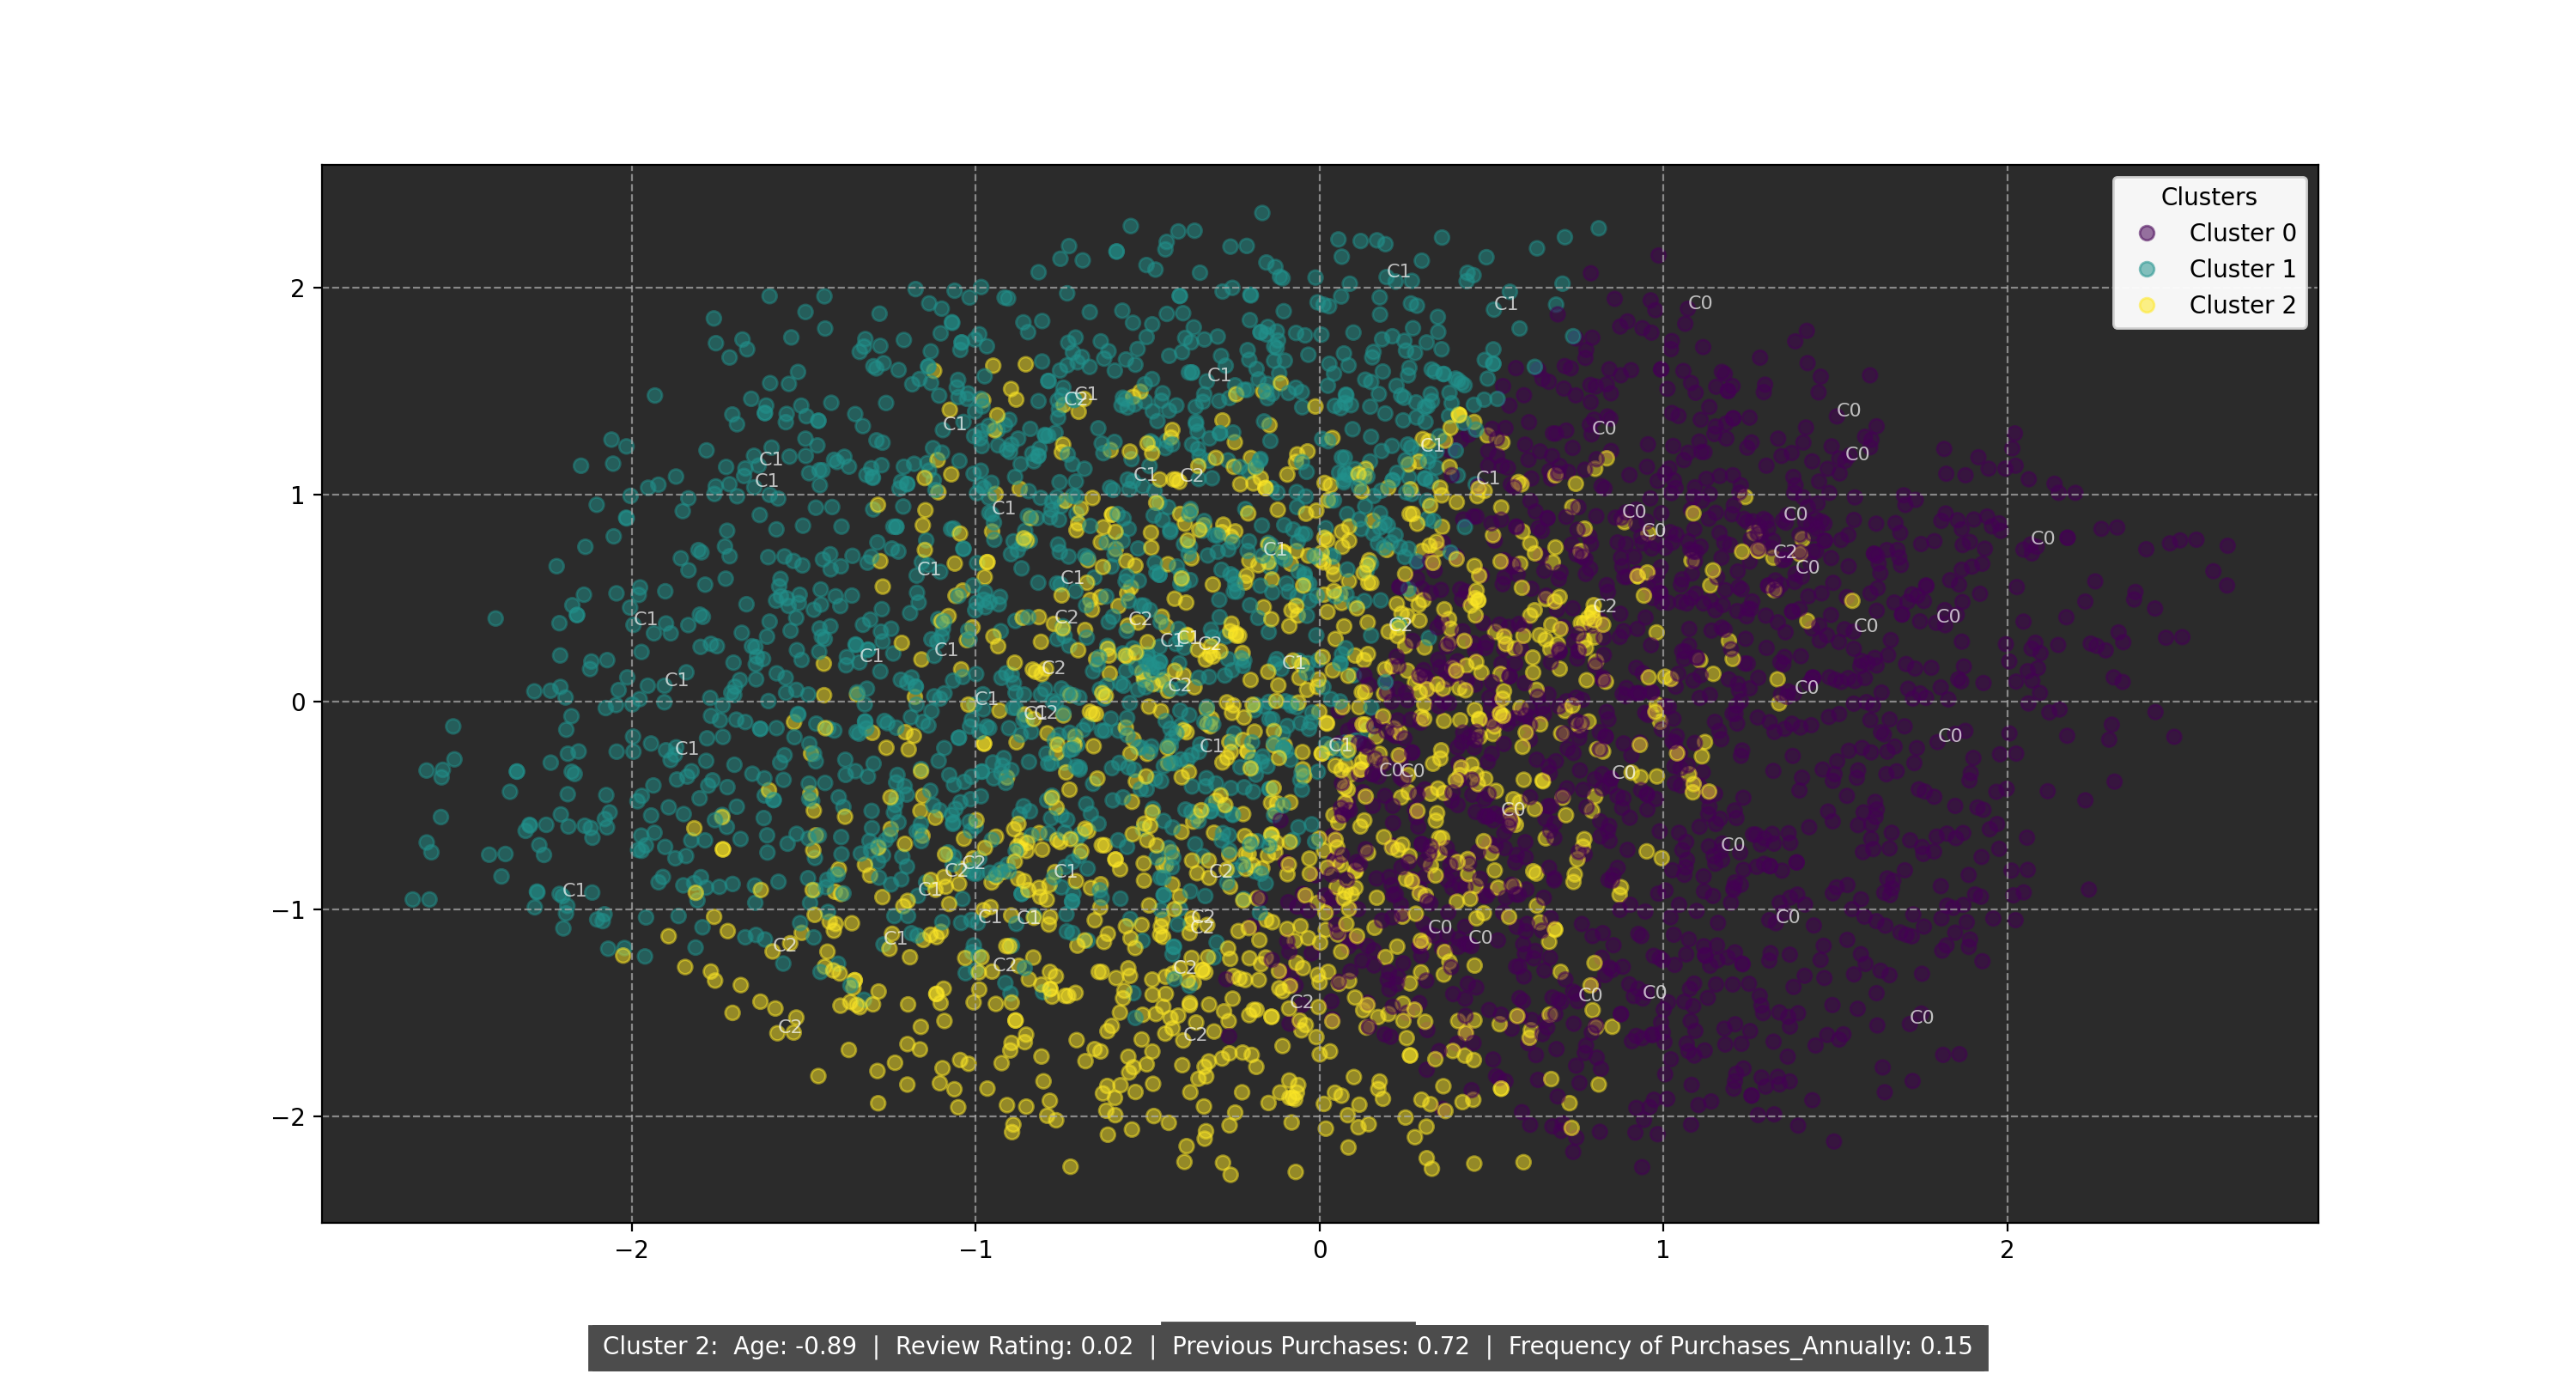

In [ ]:
# Scatter plot of clusters with simplified feature labels and a bottom panel
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', alpha=0.5)

# Add legend
legend_labels = [f'Cluster {i}' for i in range(optimal_k)]
legend = ax.legend(handles=scatter.legend_elements()[0], title='Clusters', labels=legend_labels)
ax.add_artist(legend)

# Annotate a subset of points with cluster information
for i, txt in enumerate(df.index):
    if i % 50 == 0:  # Annotate every 50th point
        ax.annotate(f'C{df["Cluster"].iloc[i]}', (df['PCA1'].iloc[i], df['PCA2'].iloc[i]),
                     fontsize=8, alpha=0.7, color='white')  # Adjusted font color

# Customize plot
ax.set_title('Customer Segmentation with Feature Labels (Subset)', fontsize=16, color='white')
ax.set_xlabel('PCA1', fontsize=14, color='white')
ax.set_ylabel('PCA2', fontsize=14, color='white')
ax.grid(True, linestyle='--', alpha=0.7)
ax.set_facecolor('#2b2b2b')  # Set background color

# Bottom panel with cluster information
cluster_info = df.groupby('Cluster')[selected_features].mean()
ax2 = fig.add_axes([0.1, 0.01, 0.8, 0.1])  # [left, bottom, width, height]
ax2.axis('off')  # Turn off axis for the bottom panel
ax2.text(0.5, 0, 'Cluster Features', fontsize=12, color='white', ha='center', va='bottom', backgroundcolor='#4c4c4c')

# Display cluster information
for cluster, features in cluster_info.iterrows():
    info_text = f'Cluster {cluster}:  '
    for feature, value in features.items():
        info_text += f'{feature}: {value:.2f}  |  '
    info_text = info_text.rstrip(' | ')  # Remove trailing separator
    ax2.text(0.5, 0, info_text, fontsize=10, color='white', ha='center', va='bottom', backgroundcolor='#4c4c4c', transform=ax2.transAxes)

plt.show()




These clusters represent groups of customers who share similar characteristics. Businesses can then analyze each cluster to understand the distinct shopping behaviors within each group and tailor marketing strategies or promotions to address the unique needs of each segment. For example, one cluster might consist of frequent buyers with high review ratings, while another might include occasional shoppers with lower ratings. This segmentation approach helps businesses optimize their interactions with customers and enhance the overall shopping experience.

# TIME SERIES ANALYSIS - GAYATHRI PERI


Time series analysis is typically applied to data that varies over time. However, the dataset you've described seems to have categorical variables ("seasons" and "Frequency of purchases") rather than continuous variables that change over time. Time series analysis is more suited for datasets where the values of a variable are observed at different points in time. Since we alredy performed a lot of other type of analyses as it might be more appropriate to use other types of analyses depending , these are just few ways to try an attempt on time series analysis to see how seasons can impact frequency of purchasing. Its a great attempt towards exploring different types of analysis that can be performed

Descriptive Statistics:

Calculate summary statistics for your "Frequency of purchases" column for each season. This might include measures like the mean, median, or mode of the frequencies. Cross-Tabulation:

Created a cross-tabulation or contingency table to explore the relationship between seasons and the frequency of purchases. This can provide insights into how the frequencies vary across different seasons. Visualization:

Use visualizations such as bar charts or pie charts to display the distribution of "Frequency of purchases" across different seasons. This can help you quickly identify any patterns or trends.

time series analysis is more appropriate when dealing with variables that change over time,such as continuous variables instead of these categorical ,for a more comprehensive understanding of trends and patterns.

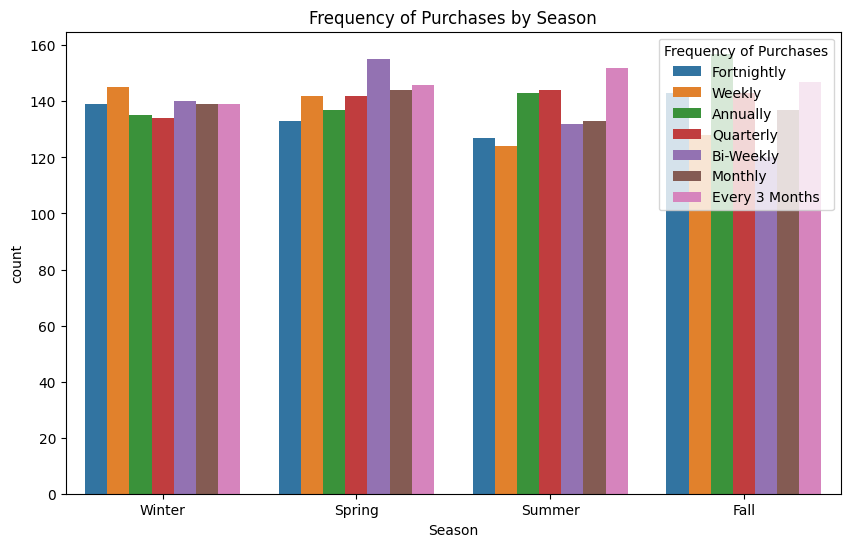

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
summary_stats = df.groupby('Season')['Frequency of Purchases'].describe()

# Cross-tabulation
cross_tab = pd.crosstab(df['Season'], df['Frequency of Purchases'])

# Visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', hue='Frequency of Purchases', data=df)
plt.title('Frequency of Purchases by Season')
plt.show()

It can be roughly concluded since even items purchased also makes an impact, but we can see weekly purchases are made during winter, and annual purchases(least frequent purchases) are done in fall